In [1]:
from corncast import Location, corn_forecast

In [2]:
rose = Location("Mt. Rose Summit", 39.3144, -119.9173)
berk = Location("Berkeley", 37.8715, -122.27)

Calling: /points/39.3144,-119.9173
Calling: https://api.weather.gov/gridpoints/REV/40,97/stations
Calling: /stations/SLIDE/observations?start=2023-11-14T17%3A00%3A22Z&end=2023-11-19T17%3A00%3A22Z


/home/smerdis/Dropbox/code/corncast/corncast.py:128: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  obs_df_full = pd.concat([pd.json_normalize(o) for o in loc.get_obs(n, start, end)], ignore_index=True)


2023-11-19 00:00:00+00:00 2023-11-19 17:00:00+00:00


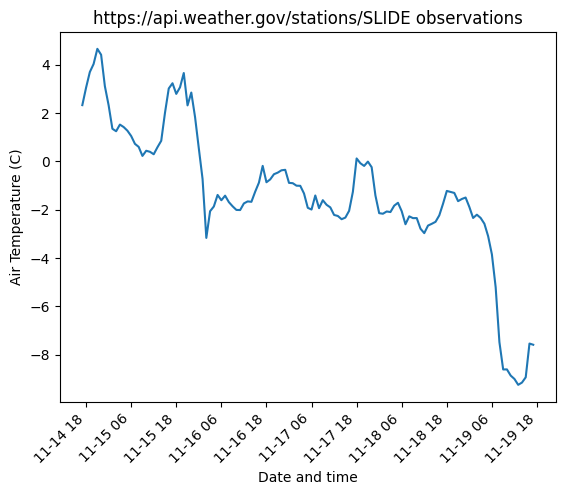

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   date         6 non-null      datetime64[ns, UTC]
 1   freeze_thaw  6 non-null      bool               
dtypes: bool(1), datetime64[ns, UTC](1)
memory usage: 182.0 bytes
Freeze-thaw cycle detected on 2 days.


In [3]:
df = corn_forecast(rose)